In [23]:
from telegram_definition_L1 import *
import sys
import glob
from datetime import datetime
import numpy as np
import pandas as pd
import re

In [24]:
tel_directory = 'D:\\SMS-Siemag\\Runtime\\JSW-CRC\\PLTCM\\TCM\\L2\\log\\tel'

messageId = {
    'MP00': 'EE13',
    'MP01': 'EE11',
    'MP02': 'EE12',
    'MP03': 'EE21',
    'MP04': 'EE22',
    'MP05': 'EE31',
    'MP06': 'EE32',
    'MP07': 'EE41',
    'MP08': 'EE42',
    'MP09': 'EE51',
    'MP10': 'EE52'
}

In [25]:
def read_segment_data_monitor():
    allTelegram_MP00 = np.array([], dtype=teltype_M23)
    tel_directory_MP00 = tel_directory + '\\*' + messageId["MP00"] + '*.tel'
    
    # MP 00 ----------------------------------------------------------------

    filelist = glob.glob(tel_directory_MP00)

    if len(filelist) > 0:
        for file in filelist:
            f = open(file, 'rb')
            onetelegram = np.fromfile(f, dtype=teltype_M23)
            allTelegram_MP00 = np.concatenate((allTelegram_MP00, onetelegram))
            f.close()
        print("MP 00: reading of data done")
    else:
        print("MP 00: no data found")
    
    return allTelegram_MP00
    

In [26]:
MP_00 = read_segment_data_monitor()

MP 00: reading of data done


In [27]:
 ti = [datetime(x['TmSegStart'][0], x['TmSegStart'][1], x['TmSegStart'][2],
                               x['TmSegStart'][3], x['TmSegStart'][4], x['TmSegStart'][5], x['TmSegStart'][6] * 1000)
                      for x in MP_00]

In [28]:
coil_id =  MP_00['CoilId'][:] 

coil_id = lambda coil_id :re.sub('[!@#$]', '', coil_id)
coil_id

<function __main__.<lambda>(coil_id)>

In [29]:
df_MP00 = pd.DataFrame({
    'time': ti,
    'SegId':MP_00['SegId'][:],
    'SetupId':MP_00['SetupId'][:],
    'CoilId': MP_00['CoilId'][:],
    'CoilIdOut':MP_00['CoilIdOut'][:],
    'LenSegStart':MP_00['LenSegStart'][:],
    'TmSinceThread':MP_00['TmSinceThread'][:],
    'LenSeg':MP_00['LenSeg'][:],
    'TmSeg':MP_00['TmSeg'][:],
    'VolSeg':MP_00['VolSeg'][:],
    'NumValSeg':MP_00['NumValSeg'][:]
})

In [30]:
df_MP00.set_index('time')

,SegId,SetupId,CoilId,CoilIdOut,LenSegStart,TmSinceThread,LenSeg,TmSeg,VolSeg,NumValSeg
time,,,,,,,,,,
2019-02-25 15:06:13.900,69,7,b'17357065000000',b'17357065000000',356.766357,331.462189,10.826264,2.959998,0.086611,297
2019-02-25 15:06:16.880,70,7,b'17357065000000',b'17357065000000',367.665558,334.445099,10.821162,2.959998,0.086562,297
2019-02-25 15:06:19.860,71,7,b'17357065000000',b'17357065000000',378.560059,337.428009,10.819055,2.959998,0.086518,297
2019-02-25 15:06:22.840,72,7,b'17357065000000',b'17357065000000',389.453033,340.410919,10.840028,2.959998,0.086664,297
2019-02-25 15:06:25.840,73,7,b'17357065000000',b'17357065000000',400.366425,343.413849,10.936307,2.979998,0.087609,299
2019-02-25 15:06:28.820,74,7,b'17357065000000',b'17357065000000',411.375610,346.396759,10.873233,2.959998,0.087268,297
2019-02-25 15:06:31.820,75,7,b'17357065000000',b'17357065000000',422.323273,349.399689,10.946319,2.979998,0.087521,299
2019-02-25 15:06:34.800,76,7,b'17357065000000',b'17357065000000',433.344025,352.382599,10.865623,2.959998,0.087135,297
2019-02-25 15:06:38.020,77,7,b'17357065000000',b'17357065000000',444.282776,355.605743,10.966314,3.199997,0.087346,321


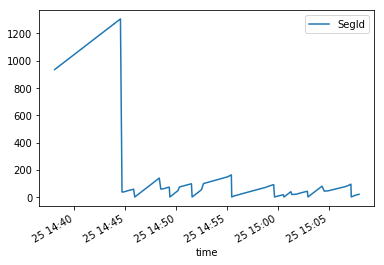

In [31]:
df_MP00.plot(x='time', y='SegId')

In [9]:
ti = df_MP00['time']

In [10]:
ti

0     2019-02-25 15:06:13.900
1     2019-02-25 15:06:16.880
2     2019-02-25 15:06:19.860
3     2019-02-25 15:06:22.840
4     2019-02-25 15:06:25.840
5     2019-02-25 15:06:28.820
6     2019-02-25 15:06:31.820
7     2019-02-25 15:06:34.800
8     2019-02-25 15:06:38.020
9     2019-02-25 15:06:41.280
10    2019-02-25 15:06:44.580
11    2019-02-25 15:06:46.180
12    2019-02-25 15:06:47.780
13    2019-02-25 15:06:49.400
14    2019-02-25 15:06:51.040
15    2019-02-25 15:06:52.720
16    2019-02-25 15:06:54.500
17    2019-02-25 15:06:56.240
18    2019-02-25 15:06:57.980
19    2019-02-25 15:06:59.720
20    2019-02-25 15:07:01.460
21    2019-02-25 15:07:03.200
22    2019-02-25 15:07:04.960
23    2019-02-25 15:07:06.700
24    2019-02-25 15:07:08.440
25    2019-02-25 15:07:10.180
26    2019-02-25 15:07:11.240
27    2019-02-25 15:07:13.660
28    2019-02-25 15:07:15.340
29    2019-02-25 15:07:16.860
                ...          
970   2019-02-25 15:04:16.680
971   2019-02-25 15:04:17.720
972   2019

In [15]:
import plotly
plotly.__version__

'3.7.1'

In [16]:
import plotly.plotly as py
import plotly.graph_objs as go

In [17]:
N = 500
random_x = np.linspace(0, 1, N)
random_y = np.random.randn(N)

In [19]:
# Create a trace
trace = go.Scatter(
    x = random_x,
    y = random_y
)

data = [trace]